<a href="https://colab.research.google.com/github/dancan123/firstGit/blob/main/Bank_Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Business Understanding
This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution sourced from [Kaggle](https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set/data). The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

## Problem statement

Term deposits are cash investment held at a financial institution and are a major source of revenue for banks--making them important for financial institutions to market. Telemarketing remains to be a popular marketing technique because of the potential effectiveness of human-to-human contact provided by a telephone call, which is sometimes quite the opposite of many impersonal and robotic marketing messages relayed through social and digital media. However, executing such direct marketing effort usually requires a huge investment by the business as large call centers need to be contracted to contact clients directly.

## Objectives
Use this data set to test the performance of your classification models and to explore the best strategies to improve a banking institution's next direct marketing campaign.

Analyze this data set and identify the patterns that will help us develop future strategies & To answer the question; How can the banking institution have more effective direct marketing campaigns in the future?



# Data Understanding
Specific details about the dataset can be found in the [Data Report](https://docs.google.com/document/d/1X5978wftiwQ_1Ef9aMhId56umDE_R8Ha-ipip15CuPI/edit?usp=sharing) found in this Repository.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#loading and previewing the data
df = pd.read_csv('bank-direct-marketing-campaigns.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bank-direct-marketing-campaigns.csv'

In [ ]:
#checking the number of rows and columns
df.shape

(41188, 20)

In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(1784)

In [ ]:
#dropping the duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking for missing values
df.isna().sum().sum()

np.int64(0)

In [ ]:
#checking the value counts for columns in search for placeholders since there are no missing values
for column in df.columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print()

Value counts for column 'age':
age
31    1825
32    1764
33    1741
35    1671
36    1670
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

Value counts for column 'job':
job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     23869
single      10997
divorced     4459
unknown        79
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: count, dtype: int64

Value counts for column 'defaul

There are no missing values, however there is a placeholder `unknown` that is used in several columns which we will maintain

## Explorative Data Analysis
View [my Dashboard here](https://powerbi.microsoft.com/)

Below is a **Pie Chart** showing the distribution of our target(y)-the rate of term deposit subscription.

In [ ]:
fig = px.pie(df, names='y', title='Distribution of Term Deposit Subscription')
fig.show()

From the piechart above, we see that our dataset target variable is clearly imbalanced and is skewed towards `No` subscription outcome.

Visual of the top campaigns that brought the highest number of subscription as well as those with the highest numbers of no subscription

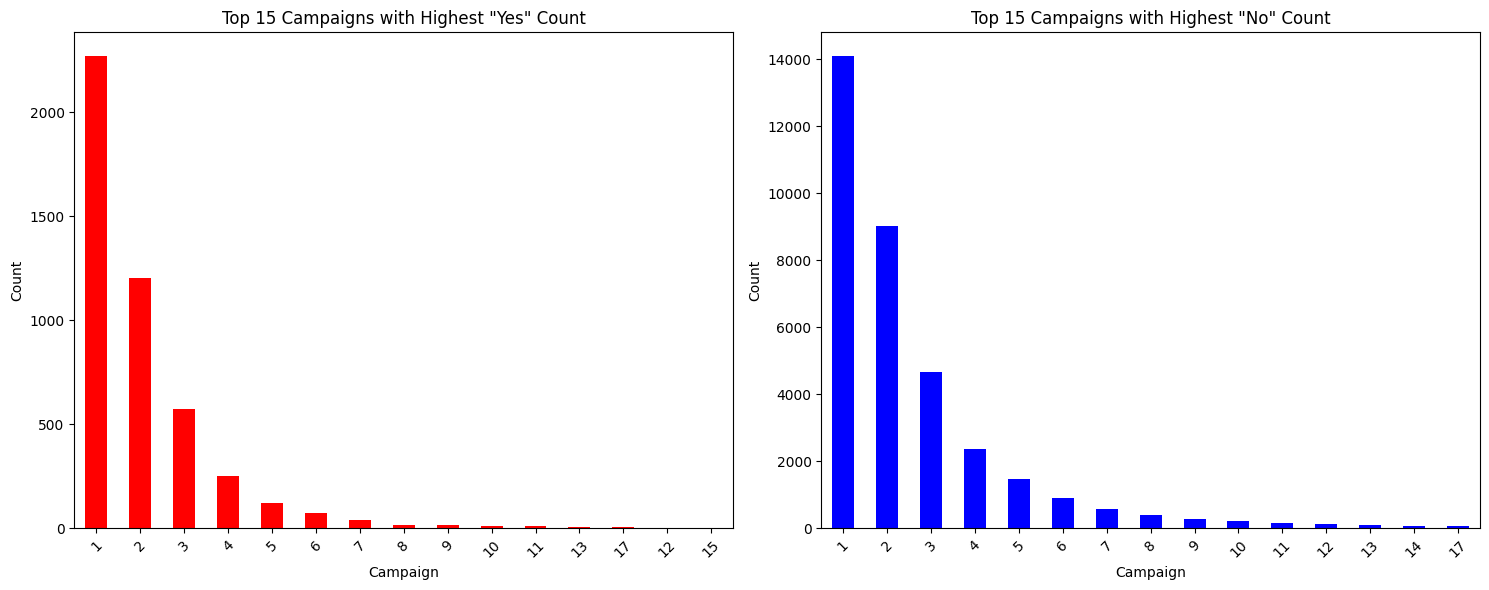

In [ ]:
campaign_counts = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)

top_yes = campaign_counts['yes'].nlargest(15)
top_no = campaign_counts['no'].nlargest(15)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_yes.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Top 15 Campaigns with Highest "Yes" Count')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_yes.index, rotation=45)

top_no.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Top 15 Campaigns with Highest "No" Count')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_no.index, rotation=45)

plt.tight_layout()
plt.show()

#### Categorical Variable Analysis
Below we visualize and see how the categorical variables impact the target(y)

1. Bar chart showing the distribution of `job` with respect to `y`

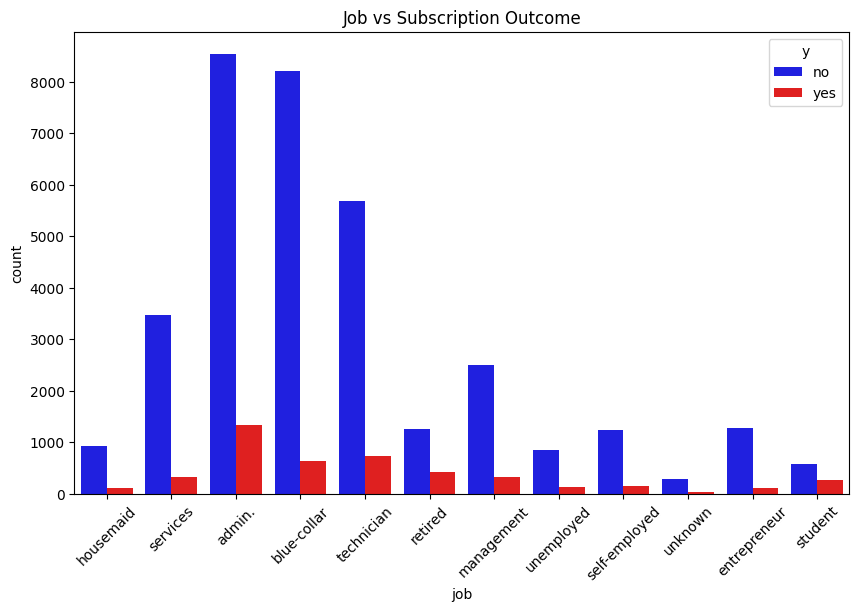

In [ ]:
plt.figure(figsize=(10, 6))
red_blue_palette = sns.color_palette(["blue", "red"])
sns.countplot(x='job', hue='y', data=df, palette=red_blue_palette)
plt.title('Job vs Subscription Outcome')
plt.xticks(rotation=45)
plt.show()

Effect of `age` on `y` to understand if there are certain age groups that are more likely to respond to campaigns

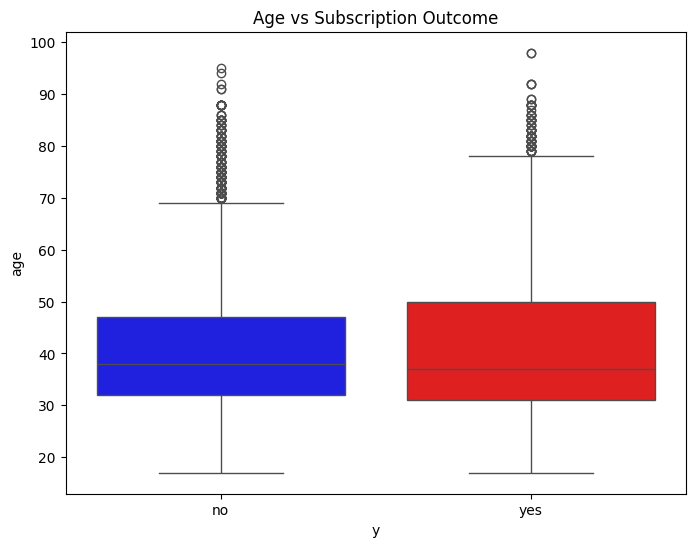

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', hue='y', data=df, palette=red_blue_palette)
plt.title('Age vs Subscription Outcome')
plt.show()

Heatmap of `housing`-`loan` vs `y` to identify how the presence or absence of housing and loan (as categorical variables) might affect the likelihood of a positive response. Banking institutions could target individuals with different financial products accordingly.

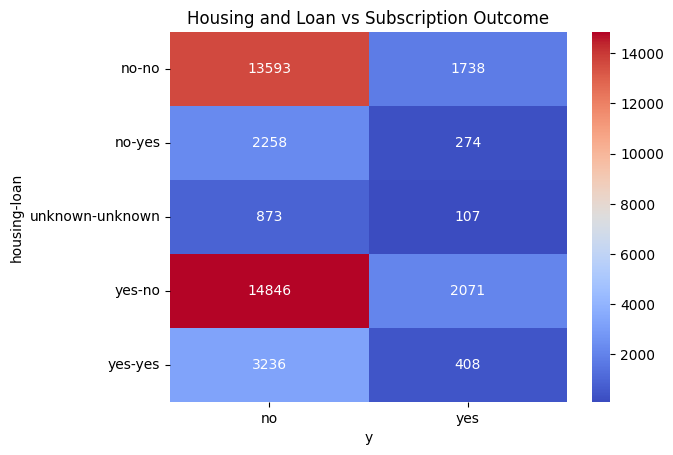

In [ ]:
housing_loan_df = pd.crosstab([df['housing'], df['loan']], df['y'])
sns.heatmap(housing_loan_df, annot=True, cmap='coolwarm', fmt='d')
plt.title('Housing and Loan vs Subscription Outcome')
plt.show()

Grouped Bar Chart for Success rate by `contact` method and `month`:To explore how the method of contact and time of contact (month) influence the likelihood of success.

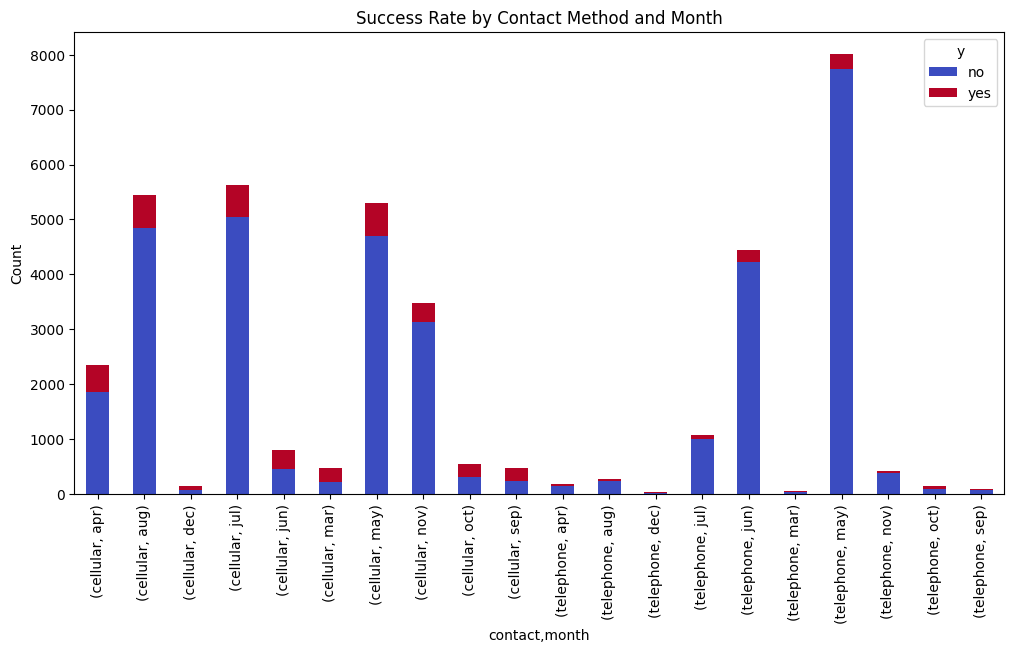

In [ ]:
contact_month_df = df.groupby(['contact', 'month', 'y']).size().unstack().fillna(0)
contact_month_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Success Rate by Contact Method and Month')
plt.ylabel('Count')
plt.show()

**Lineplot** for Success rate by number of contacts (campaign)
To explore how the number of contacts (campaign) and other related metrics like pdays (days since last contact) and previous (number of contacts performed before this campaign) impact the response rate. This helps optimize future campaigns by targeting customers who were contacted at the right time.

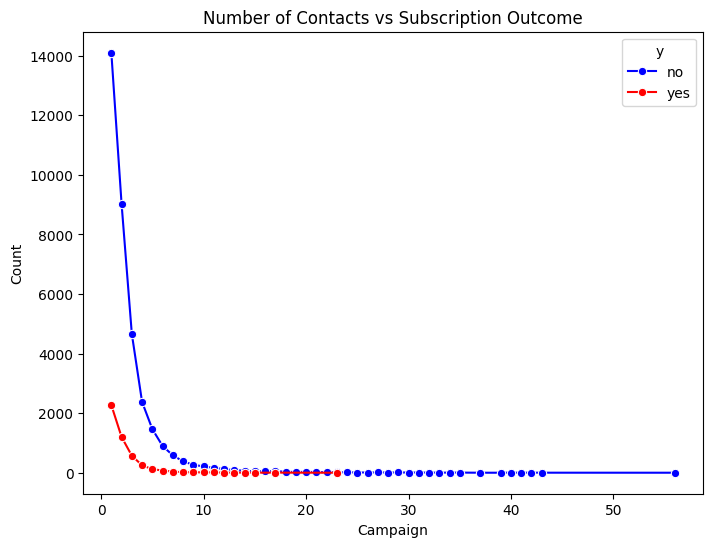

In [ ]:
count_data = df.groupby(['campaign', 'y']).size().reset_index(name='count')
plt.figure(figsize=(8, 6))

sns.lineplot(data=count_data, x='campaign', y='count', hue='y', palette=red_blue_palette, marker="o")

plt.title('Number of Contacts vs Subscription Outcome')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()

Effect of marital and education on y

Stacked bar chart or Grouped bar chart
To examine if certain marital status or education levels are more likely to result in a successful marketing outcome.

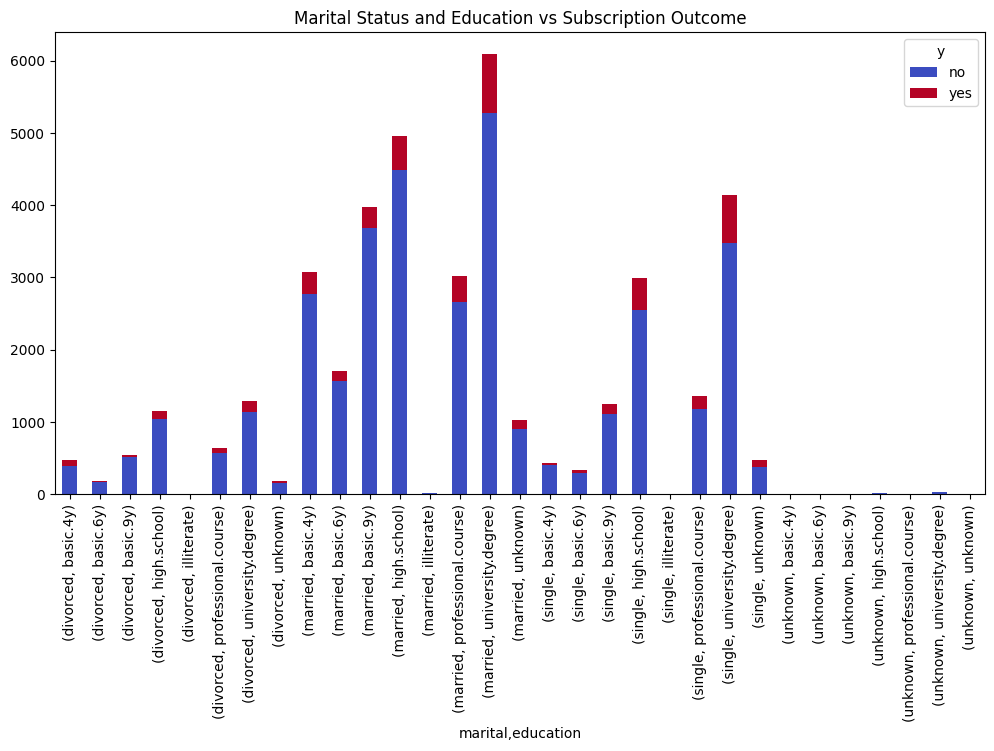

In [ ]:
marital_education_df = pd.crosstab([df['marital'], df['education']], df['y'])
marital_education_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Marital Status and Education vs Subscription Outcome')
plt.show()

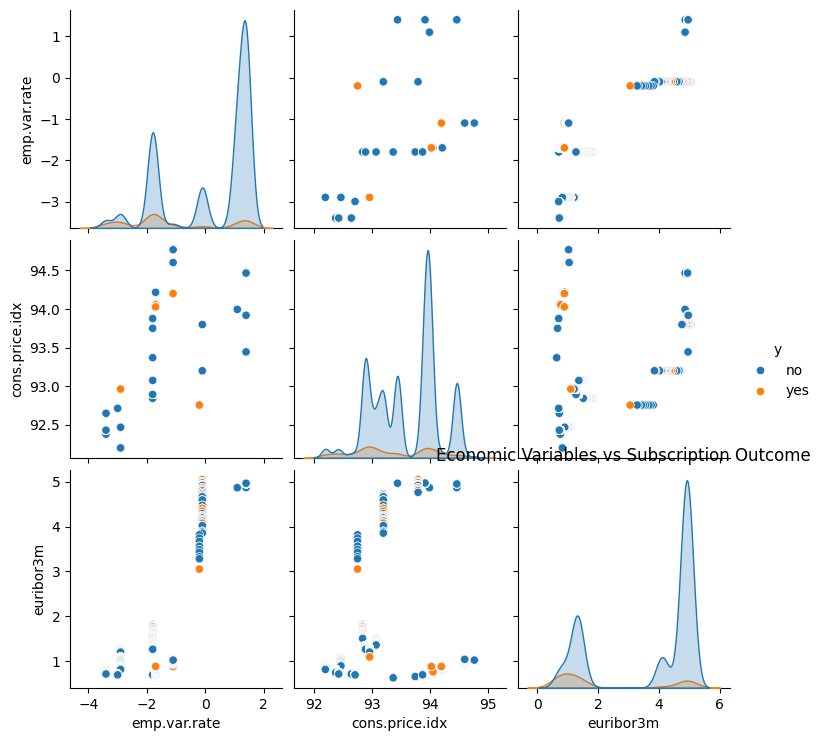

In [ ]:
sns.pairplot(df[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'y']], hue='y')
plt.title('Economic Variables vs Subscription Outcome')
plt.show()

Below is a **Correlation Heatmap** for the numeric columns which will help us identify which numerical features are highly correlated with each other or with the target variable (y).

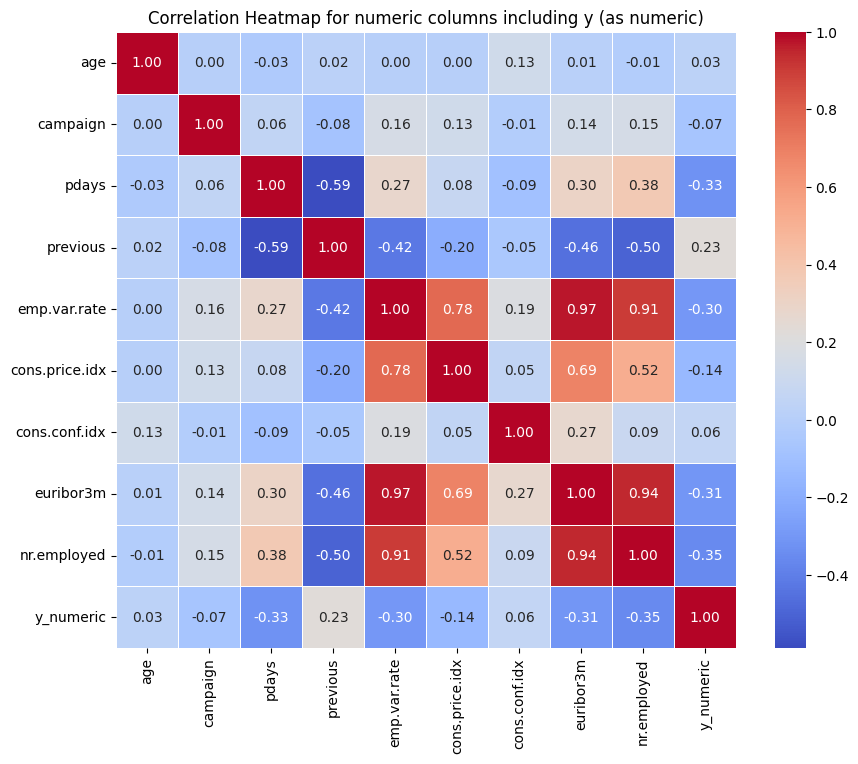

In [ ]:
 df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['number'])
numeric_df['y_numeric'] = df['y_numeric']

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for numeric columns including y (as numeric)')
plt.show()

Clustering / Segmentation-
PCA or t-SNE Plot
 To segment the customers based on multiple features and see if there are clear groups that correspond to positive or negative outcomes. This could help identify target segments for future campaigns

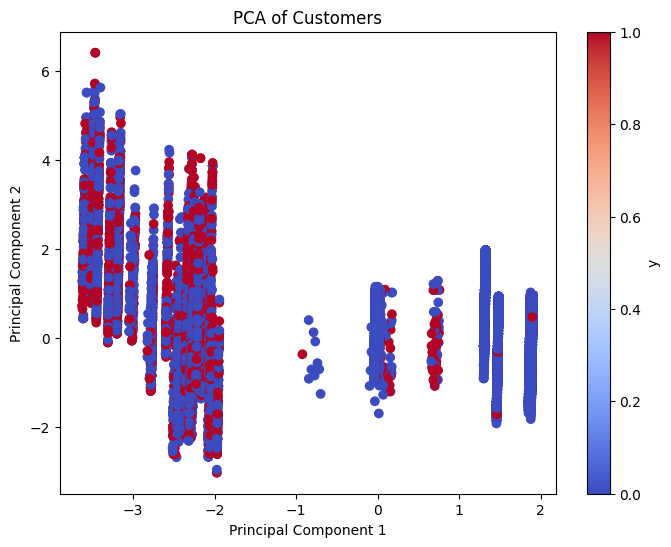

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the numerical data
numerical_columns = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df[numerical_columns]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['y'].map({'yes': 1, 'no': 0}), cmap='coolwarm')
plt.title('PCA of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='y')
plt.show()